In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
## Now import all the model libraries
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
data=pd.read_csv("data/StudentsPerformance.csv")

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data["avg_score"]=round((data["math score"]+data["reading score"]+data["writing score"])/3,0)

In [5]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0
4,male,group C,some college,standard,none,76,78,75,76.0


#### Devide data x and y(target and featues)

In [6]:
x=data.drop("avg_score",axis=1)

In [7]:
cat_features=x.select_dtypes("object").columns
numeric_features=x.select_dtypes(["int","float"]).columns

In [8]:
y=data["avg_score"]
y

0      73.0
1      82.0
2      93.0
3      49.0
4      76.0
       ... 
995    94.0
996    57.0
997    65.0
998    74.0
999    83.0
Name: avg_score, Length: 1000, dtype: float64

In [9]:
numeric_features

Index(['math score', 'reading score', 'writing score'], dtype='object')

In [10]:
cat_features

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [11]:
num_scaler=StandardScaler()
cat_encoder=OneHotEncoder()

### Use of ColumnTrasnformer
1. apply the onehot encoding on all the categorical featues.
2. apply the standard scaler on the all numeric features

In [12]:
transformer=ColumnTransformer([("cat",cat_encoder,cat_features),
                              ("num",num_scaler,numeric_features)])

In [13]:
x=transformer.fit_transform(x)

In [14]:
x.shape

(1000, 20)

In [15]:
x

array([[ 1.        ,  0.        ,  0.        , ...,  0.39002351,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.19207553,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.57771141,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.46775108,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.12609287,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  0.71993682,
         1.15336989,  1.18158627]])

In [16]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.390024,0.193999,0.391492
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.192076,1.427476,1.313269
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.577711,1.770109,1.642475
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.259543,-0.833899,-1.583744
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.653954,0.605158,0.457333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.445746,2.044215,1.774157
996,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.269803,-0.970952,-0.859491
997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.467751,0.125472,-0.201079
998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.126093,0.605158,0.589015


#### now split the data into train_test_split

In [17]:
from sklearn.model_selection import train_test_split


In [18]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [19]:
print(x_train.shape)
x_test.shape

(670, 20)


(330, 20)

In [20]:
print(y_train.shape)
y_test.shape

(670,)


(330,)

### Create a Function for the evaluate the model

In [21]:
def evaluate(true,predicted):
    r2_square=r2_score(true,predicted)
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    return r2_square,mae,mse,rmse
    

In [22]:
models={
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K Neighbour":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest":RandomForestRegressor(),
    "XgBoost":XGBRegressor(),
    "CatBoost":CatBoostRegressor()
}

In [23]:
list(models.values())[0]

LinearRegression()

In [24]:
model_list=[]
r2_score_list=[]
for i in range(len(list(models))):
    model=list(models.values())[i]
    #train the model
    model.fit(x_train,y_train)
    
    #now make the prediction using the models
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    
    #now evalutate all the score using our predefined function
    train_r2_square,train_mae,train_mse,train_rmse=evaluate(y_train,y_train_pred)
    test_r2_square,test_mae,test_mse,test_rmse=evaluate(y_test,y_test_pred)
    
    model_list.append(list(models.values())[i])
    r2_score_list.append(test_r2_square)
    
    print(f"Model: {list(models.values())[i]}")
    print(":::Statistics for Training ::::")
    print(f"R2_score for the training: {train_r2_square}")
    print(f"Mean Absluate Error for Training : {train_mae}")
    print(f"Mean Sqaured Error for Training : {train_mse}")
    print(f" Root Mean Squared Error for Training: {train_rmse}")
    print("#"*40)
    print("#"*40)
    
    print(f"Model: {list(models.values())[i]}")
    print(":::Statistics for Testing ::::")
    print(f"R2_score for the Testing: {test_r2_square}")
    print(f"Mean Absluate Error for Testing : {test_mae}")
    print(f"Mean Sqaured Error for Testing : {test_mse}")
    print(f" Root Mean Squared Error for Testing: {test_rmse}")
    print("#"*40)
    print("#"*40)
    
    
    

Model: LinearRegression()
:::Statistics for Training ::::
R2_score for the training: 0.9996172212648691
Mean Absluate Error for Training : 0.23410097947761194
Mean Sqaured Error for Training : 0.073841015260611
 Root Mean Squared Error for Training: 0.2717370332888232
########################################
########################################
Model: LinearRegression()
:::Statistics for Testing ::::
R2_score for the Testing: 0.9996792992435007
Mean Absluate Error for Testing : 0.22086292613636363
Mean Sqaured Error for Testing : 0.07121583187218869
 Root Mean Squared Error for Testing: 0.2668629458583351
########################################
########################################
Model: Lasso()
:::Statistics for Training ::::
R2_score for the training: 0.9935544256415019
Mean Absluate Error for Training : 0.8855580723424078
Mean Sqaured Error for Training : 1.2434017642240442
 Root Mean Squared Error for Training: 1.1150792636508151
########################################
##

196:	learn: 0.6084610	total: 285ms	remaining: 1.16s
197:	learn: 0.6061488	total: 287ms	remaining: 1.16s
198:	learn: 0.6050860	total: 287ms	remaining: 1.16s
199:	learn: 0.6037859	total: 288ms	remaining: 1.15s
200:	learn: 0.6003277	total: 289ms	remaining: 1.15s
201:	learn: 0.5980618	total: 290ms	remaining: 1.14s
202:	learn: 0.5956323	total: 290ms	remaining: 1.14s
203:	learn: 0.5945042	total: 291ms	remaining: 1.14s
204:	learn: 0.5937923	total: 292ms	remaining: 1.13s
205:	learn: 0.5906932	total: 292ms	remaining: 1.13s
206:	learn: 0.5872059	total: 293ms	remaining: 1.12s
207:	learn: 0.5854550	total: 294ms	remaining: 1.12s
208:	learn: 0.5848210	total: 294ms	remaining: 1.11s
209:	learn: 0.5839187	total: 295ms	remaining: 1.11s
210:	learn: 0.5832005	total: 296ms	remaining: 1.1s
211:	learn: 0.5809835	total: 297ms	remaining: 1.1s
212:	learn: 0.5783071	total: 298ms	remaining: 1.1s
213:	learn: 0.5776989	total: 299ms	remaining: 1.1s
214:	learn: 0.5770947	total: 302ms	remaining: 1.1s
215:	learn: 0.576

408:	learn: 0.3843151	total: 425ms	remaining: 614ms
409:	learn: 0.3835580	total: 426ms	remaining: 614ms
410:	learn: 0.3830000	total: 427ms	remaining: 613ms
411:	learn: 0.3822542	total: 428ms	remaining: 611ms
412:	learn: 0.3814697	total: 429ms	remaining: 610ms
413:	learn: 0.3808262	total: 430ms	remaining: 608ms
414:	learn: 0.3801684	total: 431ms	remaining: 607ms
415:	learn: 0.3792168	total: 431ms	remaining: 606ms
416:	learn: 0.3785937	total: 432ms	remaining: 604ms
417:	learn: 0.3778007	total: 433ms	remaining: 603ms
418:	learn: 0.3768530	total: 434ms	remaining: 601ms
419:	learn: 0.3763707	total: 435ms	remaining: 600ms
420:	learn: 0.3754860	total: 436ms	remaining: 599ms
421:	learn: 0.3751773	total: 437ms	remaining: 599ms
422:	learn: 0.3749182	total: 438ms	remaining: 598ms
423:	learn: 0.3741076	total: 439ms	remaining: 597ms
424:	learn: 0.3734870	total: 441ms	remaining: 596ms
425:	learn: 0.3728360	total: 442ms	remaining: 595ms
426:	learn: 0.3723727	total: 442ms	remaining: 593ms
427:	learn: 

599:	learn: 0.2907193	total: 567ms	remaining: 378ms
600:	learn: 0.2904346	total: 568ms	remaining: 377ms
601:	learn: 0.2901423	total: 569ms	remaining: 376ms
602:	learn: 0.2897224	total: 570ms	remaining: 375ms
603:	learn: 0.2892164	total: 571ms	remaining: 374ms
604:	learn: 0.2888603	total: 572ms	remaining: 373ms
605:	learn: 0.2884925	total: 573ms	remaining: 372ms
606:	learn: 0.2883003	total: 573ms	remaining: 371ms
607:	learn: 0.2880425	total: 574ms	remaining: 370ms
608:	learn: 0.2879270	total: 575ms	remaining: 369ms
609:	learn: 0.2874868	total: 576ms	remaining: 368ms
610:	learn: 0.2869758	total: 577ms	remaining: 367ms
611:	learn: 0.2867424	total: 578ms	remaining: 367ms
612:	learn: 0.2865819	total: 579ms	remaining: 366ms
613:	learn: 0.2861830	total: 580ms	remaining: 365ms
614:	learn: 0.2857549	total: 581ms	remaining: 364ms
615:	learn: 0.2853063	total: 581ms	remaining: 362ms
616:	learn: 0.2850682	total: 582ms	remaining: 361ms
617:	learn: 0.2845393	total: 583ms	remaining: 360ms
618:	learn: 

786:	learn: 0.2362526	total: 705ms	remaining: 191ms
787:	learn: 0.2360904	total: 706ms	remaining: 190ms
788:	learn: 0.2359704	total: 707ms	remaining: 189ms
789:	learn: 0.2356479	total: 709ms	remaining: 188ms
790:	learn: 0.2355870	total: 710ms	remaining: 187ms
791:	learn: 0.2353440	total: 711ms	remaining: 187ms
792:	learn: 0.2351248	total: 712ms	remaining: 186ms
793:	learn: 0.2347552	total: 713ms	remaining: 185ms
794:	learn: 0.2344504	total: 714ms	remaining: 184ms
795:	learn: 0.2343423	total: 715ms	remaining: 183ms
796:	learn: 0.2341936	total: 717ms	remaining: 183ms
797:	learn: 0.2339013	total: 718ms	remaining: 182ms
798:	learn: 0.2336289	total: 719ms	remaining: 181ms
799:	learn: 0.2334001	total: 719ms	remaining: 180ms
800:	learn: 0.2332361	total: 720ms	remaining: 179ms
801:	learn: 0.2331280	total: 721ms	remaining: 178ms
802:	learn: 0.2328620	total: 722ms	remaining: 177ms
803:	learn: 0.2325697	total: 722ms	remaining: 176ms
804:	learn: 0.2322976	total: 723ms	remaining: 175ms
805:	learn: 

979:	learn: 0.1967427	total: 846ms	remaining: 17.3ms
980:	learn: 0.1966952	total: 847ms	remaining: 16.4ms
981:	learn: 0.1962630	total: 848ms	remaining: 15.5ms
982:	learn: 0.1961816	total: 849ms	remaining: 14.7ms
983:	learn: 0.1959678	total: 850ms	remaining: 13.8ms
984:	learn: 0.1958217	total: 851ms	remaining: 13ms
985:	learn: 0.1956967	total: 852ms	remaining: 12.1ms
986:	learn: 0.1954696	total: 853ms	remaining: 11.2ms
987:	learn: 0.1952629	total: 853ms	remaining: 10.4ms
988:	learn: 0.1950150	total: 854ms	remaining: 9.5ms
989:	learn: 0.1948817	total: 855ms	remaining: 8.64ms
990:	learn: 0.1948346	total: 857ms	remaining: 7.78ms
991:	learn: 0.1948044	total: 858ms	remaining: 6.92ms
992:	learn: 0.1947328	total: 859ms	remaining: 6.05ms
993:	learn: 0.1944766	total: 859ms	remaining: 5.19ms
994:	learn: 0.1942788	total: 860ms	remaining: 4.32ms
995:	learn: 0.1939792	total: 861ms	remaining: 3.46ms
996:	learn: 0.1938720	total: 861ms	remaining: 2.59ms
997:	learn: 0.1938475	total: 862ms	remaining: 1.7

In [25]:
r2_score_list

[0.9996792992435007,
 0.9935831193916681,
 0.9996795466937833,
 0.9591189248206186,
 0.98077260333542,
 0.9921956447260748,
 0.9953762551841093,
 0.9920805339390157]

In [26]:
Result=pd.DataFrame(list(zip(model_list,r2_score_list)),columns=["Model Name","R2_Score"]).sort_values("R2_Score",ascending=False)

In [27]:
Result

,Model Name,R2_Score
2,Ridge(),0.999680
0,LinearRegression(),0.999679
6,"XGBRegressor(base_score=None, booster=None, ca...",0.995376
1,Lasso(),0.993583
5,"(DecisionTreeRegressor(max_features='auto', ra...",0.992196
7,<catboost.core.CatBoostRegressor object at 0x0...,0.992081
4,DecisionTreeRegressor(),0.980773
3,KNeighborsRegressor(),0.959119


####  AS we can see here there are some model are perfoming very good so we are taking LinearRegression


In [28]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [29]:
model.score(x_train,y_train)

0.9996172212648691

In [30]:
model.score(x_test,y_test)

0.9996792992435007

In [31]:
y_pred=model.predict(x_test)

Text(0, 0.5, 'Predicted')

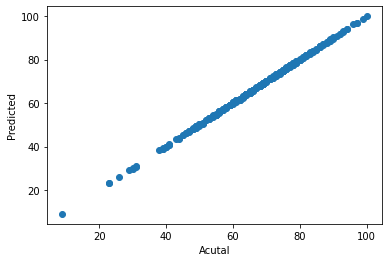

In [32]:
plt.scatter(y_test,y_pred)
plt.xlabel("Acutal")
plt.ylabel("Predicted")

<AxesSubplot: xlabel='avg_score'>

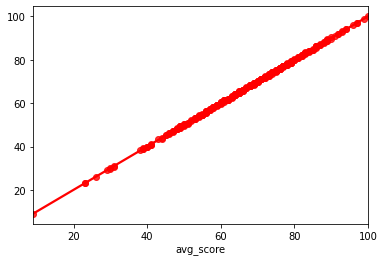

In [33]:
sns.regplot(x=y_test,y=y_pred,color="red")

In [34]:
pd.DataFrame({"Actual":y_test,"Predicted":y_pred,"Difference":y_test-y_pred})

,Actual,Predicted,Difference
521,87.0,87.001953,-0.001953
737,64.0,63.958984,0.041016
740,75.0,75.060547,-0.060547
660,75.0,74.570312,0.429688
411,82.0,81.589844,0.410156
...,...,...,...
506,68.0,68.007812,-0.007812
342,73.0,73.091797,-0.091797
485,72.0,71.675781,0.324219
711,83.0,83.253906,-0.253906
